In [6]:
# import dependencies 
import geopandas as gpd
import contextily as ctx
import pandas as pd

In [22]:
# load zipcode shapefile 
data = gpd.read_file("Zipcodes/geo_export_1e6de37f-f561-4ea3-bb46-9a1eb7e4f49c.shp")

In [23]:
# shapefile_df = pd.read_excel('Resources/shapefile_df.xlsx')

In [24]:
data.head()

,name,number_of_,objectid,zipcode,zipcodes_i,geometry
0,AUSTIN,45.0,51.0,78702,45.0,"POLYGON ((-97.69186838400699 30.248482149129, ..."
1,LIBERTY HILL,NaN,26.0,78642,20.0,"POLYGON ((-97.89359001287301 30.782117310707, ..."
2,AUSTIN,30.0,11.0,78752,5.0,"POLYGON ((-97.686347884619 30.332598550963, -9..."
3,AUSTIN,25.0,32.0,78747,26.0,"POLYGON ((-97.73618056605601 30.159870363356, ..."
4,MANOR,2.0,29.0,78653,23.0,"POLYGON ((-97.501494615524 30.477330039287, -9..."


In [18]:
# geo_df = gpd.GeoDataFrame(shapefile_df)

In [20]:
# type(geo_df)

In [21]:
# get unique zipcodes in the data 
unique_zipcodes = data.zipcode.unique()
len(unique_zipcodes)

80

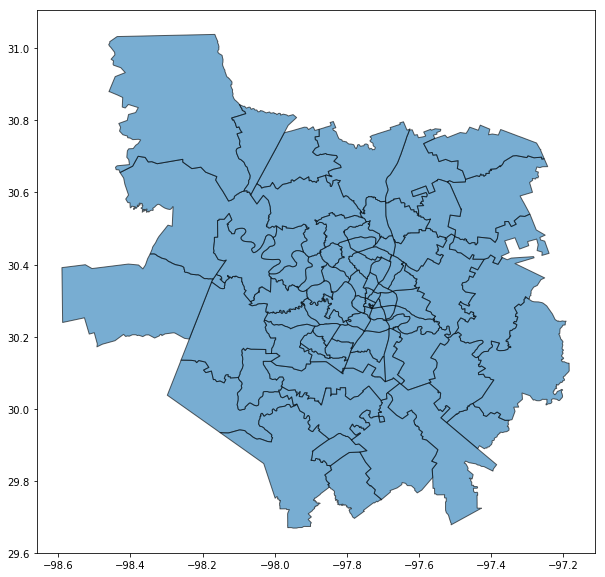

In [6]:
ax = data.plot(figsize=(10, 10), alpha=0.6, edgecolor='black')

In [7]:
# Web map tiles are typically provided in Web Mercator (EPSG 3857), so we need to make sure to convert our data first
# to the same CRS to combine our polygons and background tiles in the same map

data_mercator = data.to_crs(epsg=3857)

In [8]:
# We define a small helper function that uses contextily to add a map as background to an existing plot
import contextily as ctx

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

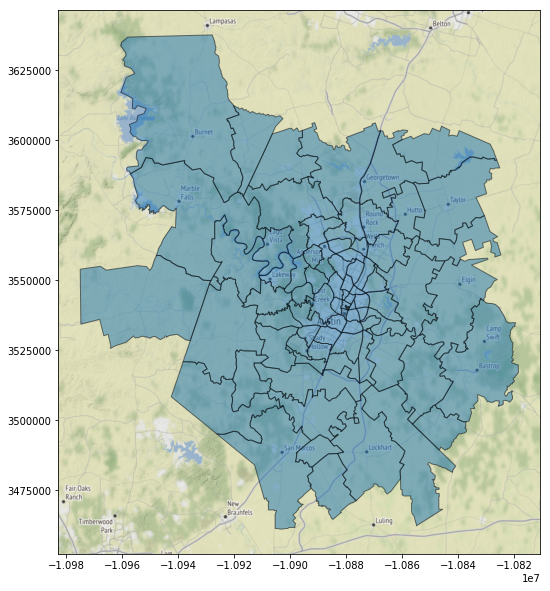

In [10]:
ax = data_mercator.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=10)

In [11]:
# drop columns
shapefile_df = data[['name', 'zipcode', 'geometry']].copy()

In [12]:
shapefile_df.head()

,name,zipcode,geometry
0,AUSTIN,78702,"POLYGON ((-97.69186838400699 30.248482149129, ..."
1,LIBERTY HILL,78642,"POLYGON ((-97.89359001287301 30.782117310707, ..."
2,AUSTIN,78752,"POLYGON ((-97.686347884619 30.332598550963, -9..."
3,AUSTIN,78747,"POLYGON ((-97.73618056605601 30.159870363356, ..."
4,MANOR,78653,"POLYGON ((-97.501494615524 30.477330039287, -9..."


In [2]:
from jsonify import convert

In [3]:
convert.jsonify('Resources/fulldata.csv')

### Group data by zipcode & Animal type

In [4]:
path_data = ('StackedBarChart/fulldata.csv')

In [7]:
full_data_df = pd.read_csv(path_data)

In [9]:
full_data_df.head()

,Unnamed: 0,index,age_upon_intake,animal_id,animal_type,breed,color,datetime,datetime2,found_location,...,lat,long,zipcode,age_upon_outcome,date_of_birth,outcome_datetime,outcome_subtype,outcome_type,sex_upon_outcome,HouseholdIncome
0,0,1,3 days,A787254,Dog,Black Mouth Cur Mix,Black/White,2019-01-10T10:19:00.000,2019-01-10T10:19:00.000,2000 Man O War in Travis (TX),...,30.347537,-97.721664,78757,2 months,2019-01-07T00:00:00.000,2019-03-19T11:00:00.000,Foster,Adoption,Spayed Female,"$45,090.00"
1,1,2,7 years,A760116,Dog,German Shepherd,Brown/Black,2019-01-07T12:07:00.000,2019-01-07T12:07:00.000,Austin (TX),...,30.267153,-97.743061,78702,7 years,2011-05-11T00:00:00.000,2019-01-10T19:20:00.000,NaN,Adoption,Spayed Female,"$23,348.00"
2,2,2,7 years,A760116,Dog,German Shepherd,Brown/Black,2019-01-07T12:07:00.000,2019-01-07T12:07:00.000,Austin (TX),...,30.267153,-97.743061,78702,7 years,2011-05-11T00:00:00.000,2019-02-09T13:14:00.000,NaN,Adoption,Spayed Female,"$23,348.00"
3,3,3,3 years,A789406,Cat,Domestic Shorthair Mix,Brown Tabby,2019-02-21T14:55:00.000,2019-02-21T14:55:00.000,Austin (TX),...,30.267153,-97.743061,78702,3 years,2015-08-21T00:00:00.000,2019-03-04T15:58:00.000,NaN,Return to Owner,Spayed Female,"$23,348.00"
4,4,4,4 years,A787054,Dog,Labrador Retriever Mix,Black/White,2019-01-24T15:17:00.000,2019-01-24T15:17:00.000,Austin (TX),...,30.267153,-97.743061,78702,4 years,2015-01-07T00:00:00.000,2019-01-20T15:02:00.000,NaN,Adoption,Neutered Male,"$23,348.00"


In [15]:
full_data_df["zipcode"].nunique()

33

In [83]:
count_data = full_data_df.groupby(['zipcode'])['animal_type'].count().reset_index()

In [120]:
# creating an empty dataframe to hold our summary data for the stacked bar chart 
data_sum = pd.DataFrame()

# number of cases
data_sum['number_cases'] = full_data_df.groupby(['zipcode'])['animal_type'].count()

# number of dogs 
dogs_df = full_data_df[full_data_df['animal_type'].str.match('Dog')]
data_sum['dog'] = dogs_df.groupby(['zipcode'])['animal_type'].count()

# number of cats 
cats_df = full_data_df[full_data_df['animal_type'].str.match('Cat')]
data_sum['cat'] = cats_df.groupby(['zipcode'])['animal_type'].count()

# number of birds
birds_df = full_data_df[full_data_df['animal_type'].str.match('Bird')]
data_sum['bird'] = birds_df.groupby(['zipcode'])['animal_type'].count()

# number of other animals
other_df = full_data_df[full_data_df['animal_type'].str.match('Other')]
data_sum['other'] = other_df.groupby(['zipcode'])['animal_type'].count()

# fill the NaNs with zeros
cases_per_zip = data_sum.fillna(0)

# reset index 
cases_per_zip = cases_per_zip.reset_index()
  
# using dictionary to convert specific columns 
convert_dict = {'zipcode': 'str', 
                'number_cases': int,
                'dog': int,
                'cat': int,
                'bird': int,
                'other': int,
               } 
  
cases_per_zip = cases_per_zip.astype(convert_dict) 

cases_per_zip

,zipcode,number_cases,dog,cat,bird,other
0,78702,72,55,15,1,1
1,78703,10,0,10,0,0
2,78717,1,1,0,0,0
3,78719,9,9,0,0,0
4,78721,4,4,0,0,0
5,78722,2,1,1,0,0
6,78723,4,4,0,0,0
7,78724,7,6,0,0,1
8,78725,2,1,1,0,0
9,78726,1,1,0,0,0


In [122]:
# # export as csv
# cases_per_zip.to_csv('StackedBarChart/casesPerZip.csv')

In [121]:
cases_per_zip.dtypes

zipcode         object
number_cases     int64
dog              int64
cat              int64
bird             int64
other            int64
dtype: object